In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
transcripts = pd.read_csv("transcripts_dataset_final.csv.gz", compression="gzip")
print(transcripts.shape)
transcripts.head(2)

(105228, 16)


,show_id,episode_id,transcript,avg_confidence,char_count,show_name,show_description,publisher,language,episode_name,episode_description,duration,show_id_trans,category,pubdate,word_count
0,show_2uE1HD7Mhar1BXrtbDTYXr,2MlANNCG8ByQl3yKo8YV33,"Hey guys, so like I'm in the middle of editing...",0.862924,20912,The Get Connected Podcast,"Getting Connected on all things Media, Mental ...",Morty,['en-AU'],Am I Liked?,"Am I liked? Well, living a life on social med...",29.238567,show_2uE1HD7Mhar1BXrtbDTYXr,Religion & Spirituality,2019-09-26,3953
1,show_2uz3xaiifukqKpvLukWcJI,41JbXYp7c2uuJoFB4TcQtD,Hello and welcome to the law review podcast. M...,0.846363,31611,The Lower View,The Lower View aims to provide an informed tak...,Nate Schertz,['en'],"MLB Sign Stealing, Bears Coaching, and Super B...",Welcome into The Lower View Podcast! In our fi...,32.394817,show_2uz3xaiifukqKpvLukWcJI,Sports,2020-01-27,5985


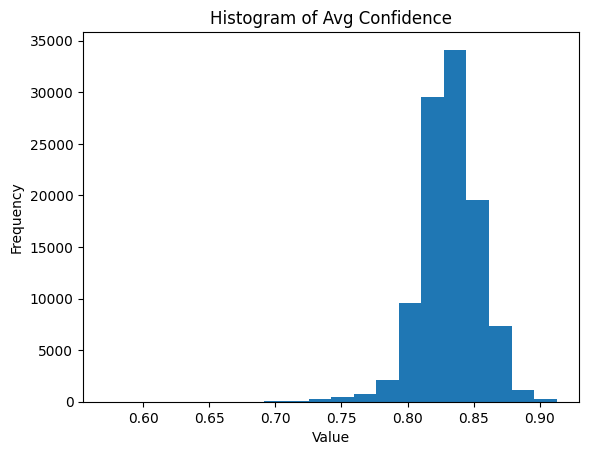

In [3]:
# Check for avg_confidence

x = transcripts.avg_confidence

# Plot the histogram using Matplotlib
plt.hist(x, bins=20)
plt.title('Histogram of Avg Confidence')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

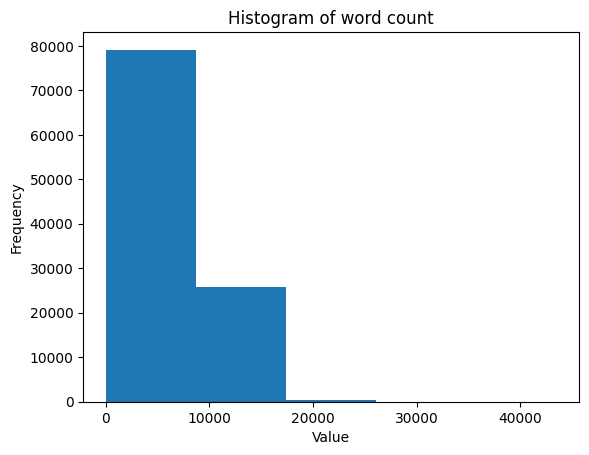

In [9]:
# Check for avg_confidence

x = transcripts.word_count

# Plot the histogram using Matplotlib
plt.hist(x, bins=5)
plt.title('Histogram of word count')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [4]:
# Check for number of transcripts deemed high quality
# High quality: Avg confidence > 0.85 and word count > 10000

count = len(transcripts.loc[(transcripts.avg_confidence > 0.85) & (transcripts.word_count > 7500)])

print(f"There are {count} instances in the dataframe with both condition1 and condition2.")

There are 1203 instances in the dataframe with both condition1 and condition2.


In [5]:
sample = transcripts.loc[(transcripts.avg_confidence > 0.85) & (transcripts.word_count > 7500)].copy()

print(sample.shape)
sample.head(3)

(1203, 16)


,show_id,episode_id,transcript,avg_confidence,char_count,show_name,show_description,publisher,language,episode_name,episode_description,duration,show_id_trans,category,pubdate,word_count
51,show_2UfNx2S4okbvJT8qffy74X,2sJDDWwqguE74ui9PtjPFH,you're tuning into the badass business podcast...,0.853032,47923,The Business Babe Podcast,The Business Babe podcast by Lauren Eliz Love:...,Lauren Eliz Love,['en'],BBP 130: FALSE BELIEFS THAT KEEP COACHES STUCK,"In this episode, Lauren Eliz Love talks about ...",49.194100,show_2UfNx2S4okbvJT8qffy74X,Education,NaN,9134
53,show_2UfNx2S4okbvJT8qffy74X,6OTFO8XFjyiUns9cnDcqAs,You're tuning in to the badass business podcas...,0.857091,50770,The Business Babe Podcast,The Business Babe podcast by Lauren Eliz Love:...,Lauren Eliz Love,['en'],BBP 128: Lauren's Journey With Alcoholism,"In this episode, Lauren Eliz Love shares her j...",54.577000,show_2UfNx2S4okbvJT8qffy74X,Education,NaN,9816
55,show_2UfNx2S4okbvJT8qffy74X,7h8FfpTZXmGSS2tS2ADuZS,We need to reactivate those two things. We nee...,0.853045,66481,The Business Babe Podcast,The Business Babe podcast by Lauren Eliz Love:...,Lauren Eliz Love,['en'],BBP152 4 Ways you may be blocking your success.,TEXT ME! 631-449-7314 The Transform Success Gr...,67.590117,show_2UfNx2S4okbvJT8qffy74X,Education,NaN,12879


In [6]:
sample.show_name.value_counts(normalize=True)

Clean With Me                                                                                  0.039069
Serial Killers                                                                                 0.034913
Cults                                                                                          0.031588
Unsolved Murders: True Crime Stories                                                           0.027431
True scary stories with Edi                                                                    0.025769
                                                                                                 ...   
Good Relationships Podcast                                                                     0.000831
THE INTELLECTUAL DARK WEB PODCAST (Hobbes + Locke + US Constitution in ONE BOOK for 14.95$)    0.000831
The Feminization Boudoir                                                                       0.000831
The Southern Cannibal Podcast: The Dinner Table                 

In [7]:
sample.to_csv('transcript_sample_mini.csv.gz', compression='gzip')

In [8]:
def tokenize_split(text):
    """simple tokeniser"""
    return text.split()

# Functions for chunking transcripts on either words or sentences
def word_chunk_transcript(transcripts, name_variable='transcript', chunk_size=256):
    """ transcripts: must have two columns - episode_id and tokenised_transcript
        chunk_size: number of tokens in chunk 
    """
    transcripts["tokenised_transcript"] = transcripts[name_variable].apply(lambda x: tokenize_split(x))

    episode_ls = []
    transcript_ls = []
    words_enum_ls = [] 
    for index, row in transcripts.iterrows():
        for i in range(0, len(row["tokenised_transcript"]), chunk_size):
            episode_ls.append(row["episode_id"])
            transcript_ls.append(" ".join(row["tokenised_transcript"][i:i+chunk_size]))
            words_enum_ls.append(f"{i} - {i+chunk_size}")
    word_chunked_df = pd.DataFrame(data = {'episode_id': episode_ls, 'transcript_subset':transcript_ls, 'words_enumerated':words_enum_ls})
    return word_chunked_df

In [9]:
# Extract columns for conversion
cols_subset = sample.loc[: ,["episode_id", "transcript"]]

In [10]:
sample_chunk = word_chunk_transcript(cols_subset)

In [11]:
sample_chunk.head()

,episode_id,transcript_subset,words_enumerated
0,2sJDDWwqguE74ui9PtjPFH,you're tuning into the badass business podcast...,0 - 256
1,2sJDDWwqguE74ui9PtjPFH,your mouth. Right? Like that's a beautiful bel...,256 - 512
2,2sJDDWwqguE74ui9PtjPFH,"makes sense. Yeah, and you have a son Leo. I h...",512 - 768
3,2sJDDWwqguE74ui9PtjPFH,fucking add up. Like when I travel it's like p...,768 - 1024
4,2sJDDWwqguE74ui9PtjPFH,to influence you like a billboard and the radi...,1024 - 1280


In [12]:
docs = sample_chunk.transcript_subset.to_list()
print(len(docs))

44631


## BERTopic

In [13]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance
from sentence_transformers import SentenceTransformer
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA, KernelPCA

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

umap_model = UMAP(
    n_neighbors=15, 
    n_components=5, 
    min_dist=0.0, 
    metric='cosine')

hdbscan_model = HDBSCAN(
    min_cluster_size = 10, # Limit at 400 clusters 
    metric='euclidean', # same as cosine for normalised data
    cluster_selection_method='eom', 
    prediction_data=True)

vectorizer_model = CountVectorizer(min_df=10, stop_words='english', ngram_range=(1,3))

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

representation_model = MaximalMarginalRelevance(diversity=0.7)

In [34]:
embeddings_mini = sentence_model.encode(docs, convert_to_numpy=True, show_progress_bar=True)

Batches: 100%|██████████| 1395/1395 [15:47<00:00,  1.47it/s]


In [36]:
# np.save('embeddings_mini.npy', embeddings_mini)

### Run model

In [16]:
embeddings_mini = np.load('embeddings_mini.npy')

In [18]:
topic_model = BERTopic(
    # embedding_model=sentence_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    representation_model=representation_model,
    low_memory = True,
    calculate_probabilities=True, 
    verbose=True  # progress bar
)

topics, probs = topic_model.fit_transform(docs, embeddings_mini)

# Save model
topic_model.save("BERT_mini")

2023-03-15 10:59:46,949 - BERTopic - Reduced dimensionality
2023-03-15 11:16:24,744 - BERTopic - Clustered reduced embeddings


In [ ]:
# BERTopic.load("BERT_mini")

In [19]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,17868,-1_im like_shit_like im_mom
1,0,1270,0_dishes_laundry_kitchen_vacuum
2,1,937,1_thank_appreciate_thank listening_itunes
3,2,533,2_mortal_halls_troy_beneath
4,3,463,3_testosterone_milligrams_steroids_hormone
...,...,...,...
611,610,10,610_come outside_calling police_calls_phones
612,611,10,611_commercial_commercials_television_ad
613,612,10,612_sandra_alan_polygraph_memorial service
614,613,10,613_obedience_penetrate_victory_battle


In [41]:
# topic_model.visualize_hierarchy()

In [2]:
topic_model.visualize_barchart(top_n_topics=10)

NameError: name 'topic_model' is not defined

### Fine-tuning

In [43]:
# Reduce outliers
new_topics = topic_model.reduce_outliers(docs, topics, strategy='distributions')


100%|██████████| 19/19 [00:45<00:00,  2.38s/it]


In [46]:
topic_model.update_topics(docs, new_topics, top_n_words=10)

In [47]:
topic_model.get_topic_info()

,Topic,Count,Name
0,0,1770,0_content_business_brand_people
1,1,1317,1_podcast_thank_episode_guys
2,2,670,2_odysseus_telemachus_said_his
3,3,567,3_testosterone_steroids_milligrams_per
4,4,651,4_eating_eat_food_calories
...,...,...,...
608,608,21,608_vee_gary_challenge_hashtag
609,609,29,609_experts_lukewarm_bucket_loyalty
610,610,28,610_water_drink_drinking_pee
611,611,34,611_limiting_beliefs_business_belief


In [50]:
topic_model.visualize_barchart()